In [8]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-f3b455b2-5a75-4357-bbf1-cf565f685605',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'TBW3jMEyTpTzcFXfnYSAYAlVsmzIVqae9e3BrAH8Ywpf'
}

configuration_name = 'os_835c369b5a794627afcde95f284df291_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('loan.csv', 'bigdata-donotdelete-pr-jsexbok7gircy5'))
df.take(5)


[Row(id=None, member_id=None, loan_amnt='2500', funded_amnt='2500', funded_amnt_inv='2500', term=' 36 months', int_rate='13.56', installment='84.92', grade='C', sub_grade='C1', emp_title='Chef', emp_length='10+ years', home_ownership='RENT', annual_inc='55000', verification_status='Not Verified', issue_d='Dec-2018', loan_status='Current', pymnt_plan='n', url=None, desc=None, purpose='debt_consolidation', title='Debt consolidation', zip_code='109xx', addr_state='NY', dti='18.24', delinq_2yrs='0', earliest_cr_line='Apr-2001', inq_last_6mths='1', mths_since_last_delinq=None, mths_since_last_record='45', open_acc='9', pub_rec='1', revol_bal='4341', revol_util='10.3', total_acc='34', initial_list_status='w', out_prncp='2386.02', out_prncp_inv='2386.02', total_pymnt='167.02', total_pymnt_inv='167.02', total_rec_prncp='113.98', total_rec_int='53.04', total_rec_late_fee='0.0', recoveries='0.0', collection_recovery_fee='0.0', last_pymnt_d='Feb-2019', last_pymnt_amnt='84.92', next_pymnt_d='Mar-2

In [9]:
sc = spark.sparkContext

In [10]:

body = client_835c369b5a794627afcde95f284df291.get_object(Bucket='bigdata-donotdelete-pr-jsexbok7gircy5',Key='LCDataDictionary.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_excel(body).dropna()
df_data_1.style.set_properties(subset=['Description'], **{'width': '1000px'})

# df_description = pd.read_excel('../input/lending-club-loan-data/LCDataDictionary.xlsx').dropna()



,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.count()

2260668

In [ ]:
df.printSchema

In [13]:
for col in df.columns:
    print(col, "\t", "with null values: ", df.filter(df[col].isNull()).count())

id 	 with null values:  2260668
member_id 	 with null values:  2260668
loan_amnt 	 with null values:  0
funded_amnt 	 with null values:  0
funded_amnt_inv 	 with null values:  0
term 	 with null values:  0
int_rate 	 with null values:  0
installment 	 with null values:  0
grade 	 with null values:  0
sub_grade 	 with null values:  0
emp_title 	 with null values:  166931
emp_length 	 with null values:  0
home_ownership 	 with null values:  0
annual_inc 	 with null values:  4
verification_status 	 with null values:  0
issue_d 	 with null values:  0
loan_status 	 with null values:  0
pymnt_plan 	 with null values:  0
url 	 with null values:  2260667
desc 	 with null values:  2134600
purpose 	 with null values:  1
title 	 with null values:  23323
zip_code 	 with null values:  2
addr_state 	 with null values:  1
dti 	 with null values:  1712
delinq_2yrs 	 with null values:  30
earliest_cr_line 	 with null values:  30
inq_last_6mths 	 with null values:  31
mths_since_last_delinq 	 with null 

In [19]:
a4_dims = (11.27, 8.27)

In [14]:
df.groupBy(['loan_status']).count().show(10,  truncate = False)

+---------------------------------------------------+-------+
|loan_status                                        |count  |
+---------------------------------------------------+-------+
|Fully Paid                                         |1041952|
|Default                                            |31     |
|In Grace Period                                    |8952   |
|Does not meet the credit policy. Status:Fully Paid |1988   |
|Charged Off                                        |261654 |
|Oct-2015                                           |1      |
|Late (31-120 days)                                 |21897  |
|Current                                            |919695 |
|Does not meet the credit policy. Status:Charged Off|761    |
|Late (16-30 days)                                  |3737   |
+---------------------------------------------------+-------+



In [26]:
loan_status = df.groupBy('loan_status').count().toPandas()

loan_status

,loan_status,count
0,Fully Paid,1041952
1,Default,31
2,In Grace Period,8952
3,Does not meet the credit policy. Status:Fully ...,1988
4,Charged Off,261654
5,Oct-2015,1
6,Late (31-120 days),21897
7,Current,919695
8,Does not meet the credit policy. Status:Charge...,761
9,Late (16-30 days),3737


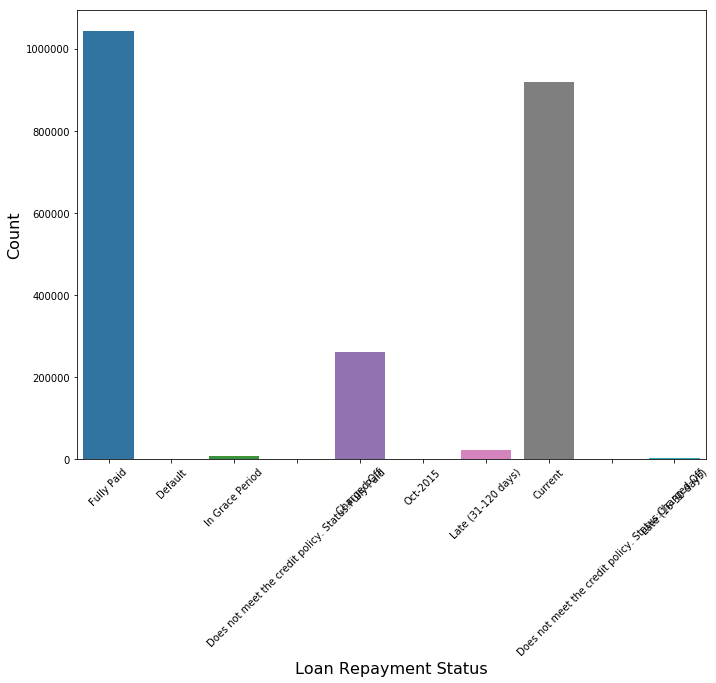

In [29]:
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'loan_status', y = 'count', data = loan_status)

ax.set_xlabel("Loan Repayment Status", fontsize=16)
ax.set_ylabel("Count", fontsize = 16)
ax.tick_params(axis='x',rotation=45)
plt.show()

In [55]:
loan_amount = df.groupBy('loan_amnt').count().toPandas()

In [58]:
loan_amount

,loan_amnt,count
0,16250,205
1,5325,303
2,5925,255
3,32275,43
4,39350,17
5,28675,62
6,35350,11
7,7650,299
8,28500,844
9,4975,187


TypeError: unsupported operand type(s) for /: 'str' and 'int'

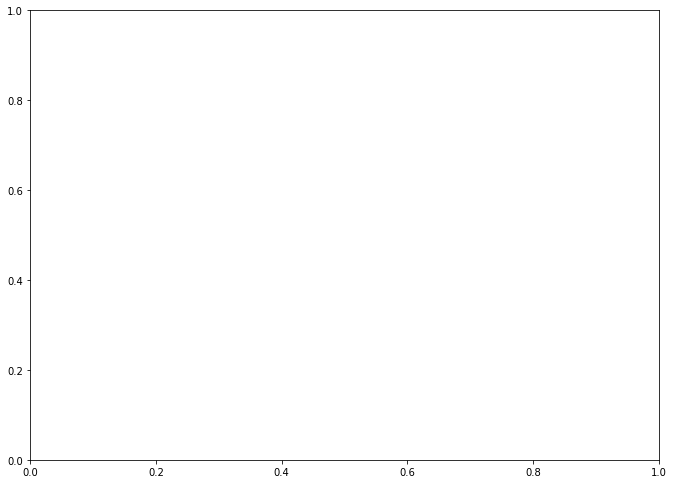

In [60]:
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.distplot(loan_amount['loan_amnt'], bins = 30)

ax.set_xlabel("Loan Amount", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)
ax.set_title("Loan Amount Issued", fontsize = 20)
plt.show()

In [51]:
df.groupBy('loan_amnt').count().orderBy('count', ascending = False).show()


+---------+------+
|loan_amnt| count|
+---------+------+
|    10000|187236|
|    20000|131006|
|    15000|123226|
|    12000|121681|
|    35000| 86285|
|     5000| 84765|
|     8000| 75033|
|     6000| 72089|
|    25000| 66453|
|    16000| 66418|
|    30000| 61010|
|    24000| 56302|
|    18000| 50271|
|     7000| 37867|
|    14000| 34556|
|    40000| 33368|
|     4000| 32375|
|    28000| 30460|
|     3000| 29668|
|    21000| 26324|
+---------+------+
only showing top 20 rows



In [22]:
df.groupBy('addr_state').count().show(truncate = False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|addr_state                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [52]:
add_state = df.groupBy('addr_state').count().toPandas()

add_state
# fig, ax = plt.subplots(figsize = a4_dims)
# ax = sns.countplot(x = 'addr_state', hue = 'Address', data = add_state)

# ax.set_xlabel("Address by State", fontsize=16)
# ax.tick_params(axis='x',rotation=45)
# plt.show()

,addr_state,count
0,Helping Kenya's Deaf Children,1
1,223xx,1
2,175 (total projected payments)<br/><br/>Intere...,1
3,financially I made a few errors in judgment. ...,1
4,and businessman,1
5,not paid for by financial aid and scholarship...,1
6,etc. First,1
7,AZ,53769
8,SC,28001
9,we both stand to benefit! You can have peace ...,1


In [16]:
df.groupBy('term').count().show()

+----------+-------+
|      term|  count|
+----------+-------+
| 36 months|1609754|
| 60 months| 650914|
+----------+-------+



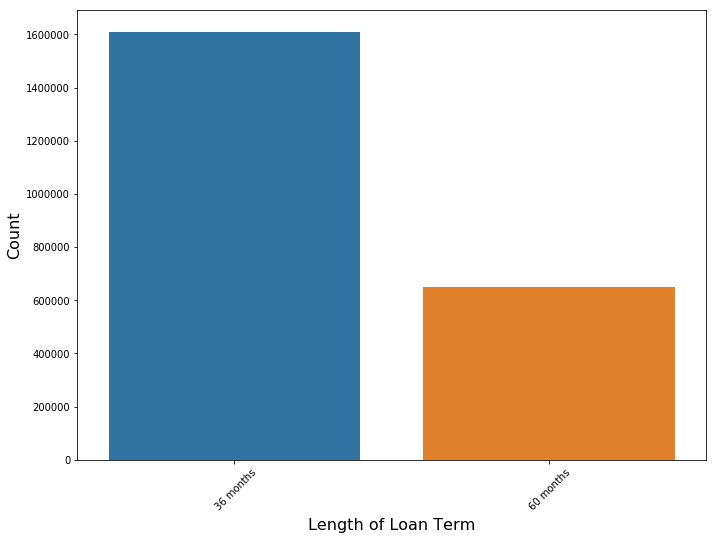

In [32]:
term = df.groupBy('term').count().toPandas()

fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'term', y = 'count', data = term)

ax.set_xlabel("Length of Loan Term", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.tick_params(axis='x',rotation=45)
plt.show()

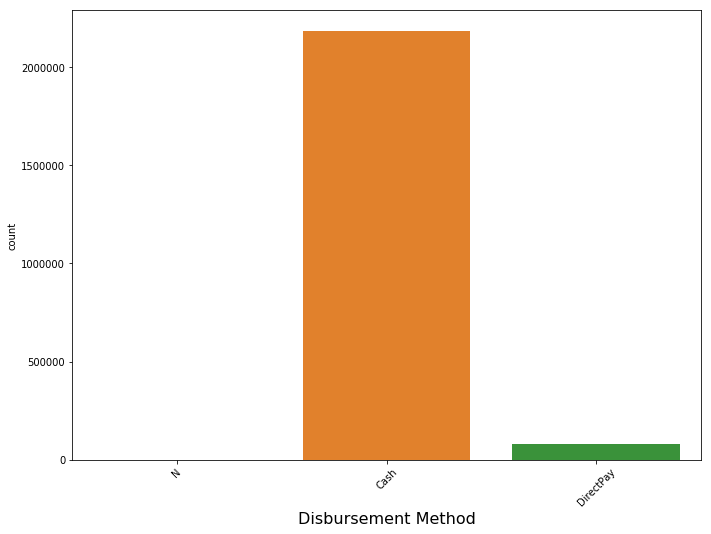

In [34]:
dis_method = df.groupBy('disbursement_method').count().toPandas()

fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'disbursement_method', y = 'count', data = dis_method)

ax.set_xlabel("Disbursement Method", fontsize=16)
ax.tick_params(axis='x',rotation=45)
plt.show()